In [ ]:
import pandas as pd
from flair.models import TextClassifier
from flair.data import Sentence
import seaborn as sns
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

#### Loading the quotes about climate from 2018 and 2019

In [ ]:
df_18 = pd.read_pickle('data/climate_df_2018.pkl')

In [ ]:
df_19 = pd.read_pickle('data/climate_df_2019.pkl')

##### Using the Flair library to attribute a sentiment (Positive/Negative) and a score ([0,1]) to each quote in the dataframe

In [3]:
classifier = TextClassifier.load('en-sentiment')
def get_sentiment_score(text): 
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.labels

2021-11-11 13:56:19,885 loading file /home/jupyter-hannah/.flair/models/sentiment-en-mix-distillbert_4.pt


In [ ]:
df_18['sentiment'] = df_18.apply(lambda x : get_sentiment_score(x.quotation), axis=1)

In [8]:
df_19['sentiment'] = df_19.apply(lambda x : get_sentiment_score(x.quotation), axis=1)

##### Writing the dataframes to pickle files for later use

In [9]:
df_19.to_pickle('data/climate_df_sentiments_2019.pkl')

In [ ]:
df_18.to_pickle('data/climate_df_sentiments_2018.pkl')

##### Reading the dataframes 

In [4]:
df_18 = pd.read_pickle('data/climate_df_sentiments_2018.pkl')

In [5]:
df_19 = pd.read_pickle('data/climate_df_sentiments_2019.pkl')

##### Mapping the sentiment score. Negative sentiments are mapped to negative floating point numbers, positive sentiments to positive ones. This allows to take the mean of the sentiment over a certain amount of time

In [6]:
def sentiment_mapping(df): 
    df['sentiment_score'] = df.sentiment.apply(lambda x: float(str(x)[11:-2]) if str(x)[1] == 'P' else -float(str(x)[11:-2]))

##### Extracting the month of the quote from the quoteID to be able to group them by time.  

In [7]:
def month_mapping(df): 
    df['month'] = df.quoteID.str.slice(start= 5, stop=7)

In [77]:
def plot_months(df): 
    #Plotting the number of quotes per month
    df.groupby('month')['quoteID'].count().plot(kind='bar')


In [33]:
def plot_wordcloud(df, title_text): 
    #Wordcloud for the specific dataframe
    text = "".join(quote for quote in df.quotation)
    wordcloud = WordCloud( background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title_text)
    plt.axis("off")
    plt.show()

In [42]:
def plot_sentiment_months(df):
    #Plotting the mean sentiment score of each month
    sentiment_monthly = df.groupby('month')['sentiment_score'].mean()
    fig = sns.lineplot(data=sentiment_monthly , x=sentiment_monthly.index, y=sentiment_monthly.values, legend='brief')
    fig.set(xlabel='month', ylabel='mean sentiment score', title='mean monthly sentiment score')
    

In [ ]:
def best_and_worst_quote(df):
    best = df.loc[df.sentiment_score.max()]
    worst = df.loc[df.sentiment_score.min()]
    

In [ ]:
best_and_worst_quote(df_18)

In [27]:
month_mapping(df_18)
month_mapping(df_19)
sentiment_mapping(df_18)
sentiment_mapping(df_19)

#### Plotting the two years against each other to find similarities and differences

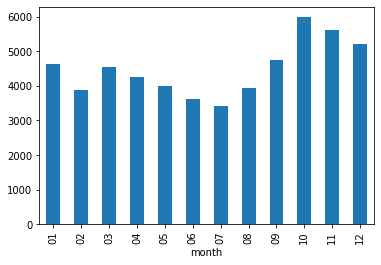

In [79]:
plot_months(df_18)

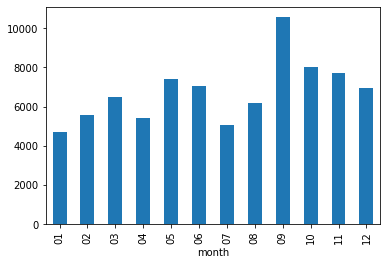

In [78]:
plot_months(df_19)

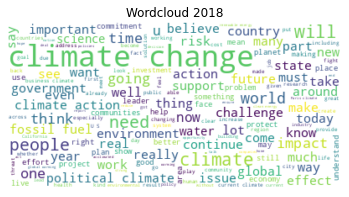

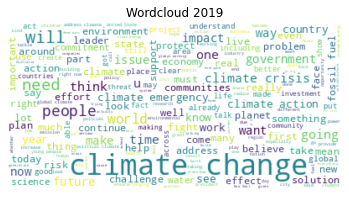

In [34]:
plot_wordcloud(df_18, 'Wordcloud 2018')
plot_wordcloud(df_19, 'Wordcloud 2019')

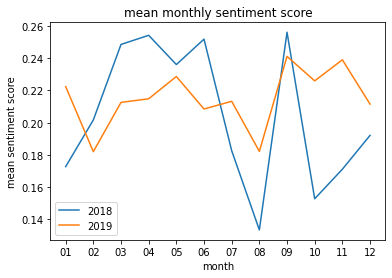

In [45]:
plot_sentiment_months(df_18)
plot_sentiment_months(df_19)
plt.legend(labels=["2018","2019"])

##### Comparing Greta Thunberg's quotes over the two years

In [47]:
greta_18 = df_18[df_18.speaker.str.contains('greta thunberg', na=False, case=False)]
greta_19 = df_19[df_19.speaker.str.contains('greta thunberg', na=False, case=False)]

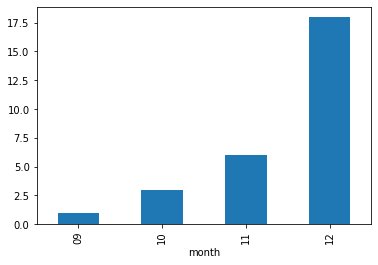

In [48]:
plot_months(greta_18)

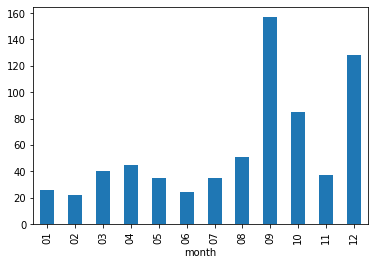

In [80]:
plot_months(greta_19)

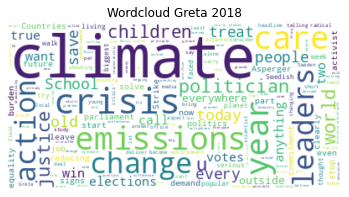

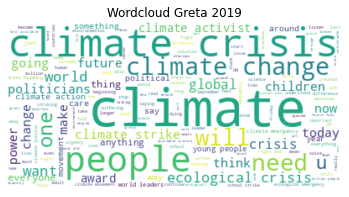

In [82]:
plot_wordcloud(greta_18, 'Wordcloud Greta 2018')
plot_wordcloud(greta_19, 'Wordcloud Greta 2019')

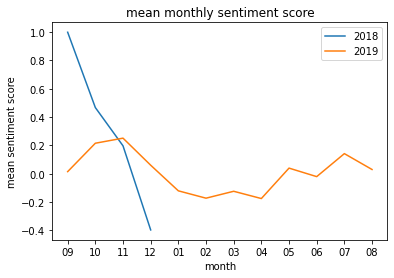

In [83]:
plot_sentiment_months(greta_18)
plot_sentiment_months(greta_19)
plt.legend(labels=["2018","2019"])

##### Comparing Donald Trump with Greta Thunberg in the year 2019

In [88]:
trump_19 = df_19[df_19.speaker.str.contains('donald trump', na=False, case=False)]
trump_18 = df_18[df_18.speaker.str.contains('donald trump', na=False, case=False)]

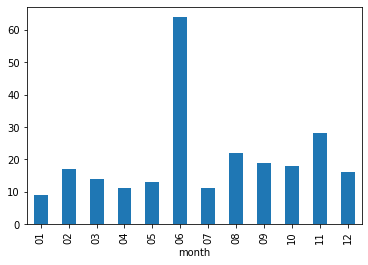

In [85]:
plot_months(trump_19)

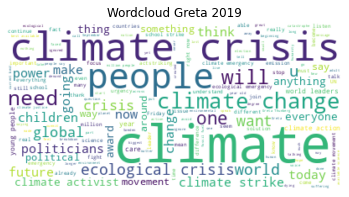

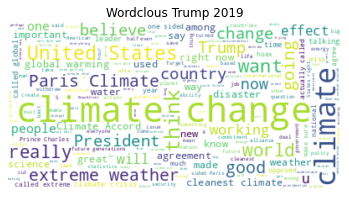

In [86]:
plot_wordcloud(greta_19, 'Wordcloud Greta 2019')
plot_wordcloud(trump_19, 'Wordclous Trump 2019')

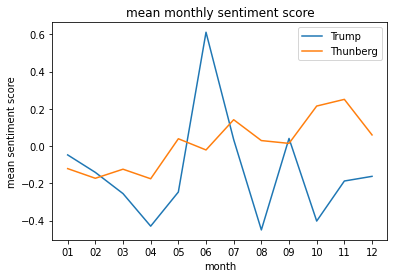

In [87]:
plot_sentiment_months(trump_19)
plot_sentiment_months(greta_19)
plt.legend(labels=["Trump","Thunberg"])

##### Comparing Trump before and after Greta

In [ ]:
df_sentiments['sentiment_score'] = df_sentiments.sentiment.apply(lambda x: float(str(x)[11:-2]) if str(x)[1] == 'P' else -float(str(x)[11:-2]))

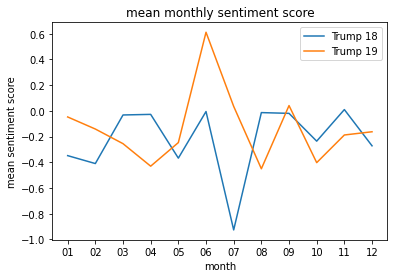

In [89]:
plot_sentiment_months(trump_18)
plot_sentiment_months(trump_19)
plt.legend(labels=["Trump 18","Trump 19"])